In [1]:
#Import statements

import os
import random
# import gym
# from gym import Env
import numpy as np
# from gym.spaces import Discrete
from enum import Enum
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
import math
import Decision_Matrix as dm

In [2]:
#Battlefield setup

class Player():
    def __init__(self,name, decksize=60, num_creatures = 20, num_spells = 20) :
       self.name = name
       self.life = 20
       self.decksize = decksize
       self.battlefield = []
       self.deck = self.build_deck(num_creatures,num_spells)
       self.hand = []
       self.landforturn = False
       self.opponent= None 
        
    def set_opponent(self, opponent):
        self.opponent = opponent
        
        
    def build_deck(self,num_creatures,num_spells):
        deck = []
        for i in range(num_creatures):
            deck.append('creature')
        for i in range(num_spells):
            deck.append('spell')
        for i in range(self.decksize - num_creatures - num_spells):
            deck.append('land')
        return deck
    
    def draw(self, number_draw = 1):
        try:
            for i in range(number_draw):
                self.hand.append(self.deck.pop(0))
        except IndexError:
            print("Deck size", len(self.deck), "Draw Error")
            
    def attack(self, num_attackers):
        tapper = 0
        for k in range(len(self.battlefield)):
            if self.battlefield[k] == "creature":
                if tapper < num_attackers:
                    self.battlefield[k] = "tapped_creature"
                    tapper += 1
                    
    def block(self, num_block, num_attack):
        counter = 0
        for k in range(num_block):
            if k+1 <= num_attack:
                self.opponent.battlefield.remove("tapped_creature")
                self.battlefield.remove("creature")
        if num_attack >= num_block:
            damage = (num_attack - num_block) * 2
            self.life -= damage
            print(f"{self.name} lost {damage} life.")
        else:
            print("overblocked")
            
    def play(self,  card_choice, target_choice = 0,):
        if card_choice == 'creature': 
            manapool = 0
            tapper = 0
            for k in range(len(self.battlefield)):
                if self.battlefield[k] == 'land':
                    if tapper < 2:
                        self.battlefield[k] = 'tapped_land'
                        tapper += 1
            self.battlefield.append(card_choice)
        elif card_choice == 'spell': #spell
            # Play a spell, target choices are [p1, p2, p1 u_c, p1 t_c, p2 u_c, p2 t_C]
            # going from 1-6
            self.play_spell(target_choice)
        elif card_choice == 'land':
            #if self.player1.landforturn == True:
                #print("You have already played a land for turn")
                #reward(penalty)
                #choose_card_choice([1])
            self.battlefield.append(card_choice)
            self.landforturn = True
        self.hand.remove(card_choice)
            
    def play_spell(self,target_choice):
        tapper = 0        
        for k in range(len(self.battlefield)):
            if self.battlefield[k] == 'land':
                 if tapper < 1:
                    self.battlefield[k] = 'tapped_land'
                    tapper += 1
            # spell effects
            # Based on choice, remove that amount of life or that kind of creature from
            # appopriate battlefield
        if target_choice == "self":
            self.life = self.life - 3
            print(f"{self.name}'s life total was targeted by a spell.")
        elif target_choice == "opponent":
            self.opponent.life = self.opponent.life - 3
            print(f"{self.opponent.name}'s life total was targeted by a spell.")
        elif target_choice == "self_untapped_creature":
            if "creature" in self.battlefield: 
                self.battlefield.remove("creature")
            print(f"{self.name}'s untapped creature was targeted by a spell.")
        elif target_choice == "self_tapped_creature":
            if "tapped_creature" in self.battlefield: 
                self.battlefield.remove("tapped_creature")
            print(f"{self.name}'s tapped creature was targeted by a spell.")
        elif target_choice == "opponent_untapped_creature":
            if "creature" in self.opponent.battlefield: 
                self.opponent.battlefield.remove("creature")
            print(f"{self.opponent.name}'s untapped creature was targeted by a spell.")
        elif target_choice == "opponent_tapped_creature":
            if "tapped_creature" in self.opponent.battlefield:
                self.opponent.battlefield.remove("tapped_creature")
            print(f"{self.opponent.name}'s tapped creature was targeted by a spell.")
        else:
            print("Target acquired " ,target_choice)

    def turn(self):
        self.landforturn = False
        for k in range(len(self.battlefield)):
            if self.battlefield[k] == "tapped_creature":
                    self.battlefield[k] = "creature"
            if self.battlefield[k] == "tapped_land":
                    self.battlefield[k] = "land"
        self.draw()
            
            
class magicgame():
    def __init__(self,player1, player2):
        self.player1 = player1
        self.player2 = player2
        random.shuffle(self.player1.deck)
        random.shuffle(self.player2.deck)
        self.player1.draw(7)    
        self.player2.draw(7)
        #phases for each player will be main phase 1, attacker phase, and blocking phase (1, 2, 3)
        self.phase = 1
        
    #Game Set up

    
    def show_battlefield(self):
        print("\n __________________________________________________________")
        print("\n", self.player2.hand)
        print("\n _____ P2 _____ Life: ", self.player2.life)
        for k in range(len(self.player2.battlefield)):
            #L = untapped land
            if self.player2.battlefield[k] == "land":
                print("L", end = " ")
            #l = tapped land
            elif self.player2.battlefield[k] == "tapped_land":
                print("l", end = " ")
        print("\n")
        for k in range(len(self.player2.battlefield)):
            #C = untapped creature
            if self.player2.battlefield[k] == "creature":
                print("C", end = " ")
            #c = tapped creature
            elif self.player2.battlefield[k] == "tapped_creature":
                print("c", end = " ")
        print("\n")
        for k in range(len(self.player1.battlefield)):
            if self.player1.battlefield[k] == "creature":
                print("C", end = " ")
            elif self.player1.battlefield[k] == "tapped_creature":
                print("c", end = " ")
        print("\n")
        for k in range(len(self.player1.battlefield)):
            if self.player1.battlefield[k] == "land":
                print("L", end = " ")
            elif self.player1.battlefield[k] == "tapped_land":
                print("l", end = " ")
        print("\n _____ P1 _____ Life: ", self.player1.life)
        print("\n", self.player1.hand)
        
    
    def nextphase(self):
        self.phase += 1
        if self.phase == 4:
            self.phase = 11
        elif self.phase == 14:
            self.phase = 1
        else:
            pass
        
    def show_winner(p1, p2, deck):
        print("P1 life: " + str(p1))
        print("P2 life: " + str(p2))
        print("P1 Deck size", len(player1.deck))
        print("P2 Deck size", len(player2.deck))
        winner = ""
        if p1 < 1:
            print("P1 loses, P2 wins")
            winner = "P2"
            AI_win = True
        elif p2 < 1:
            print("P2 loses, P1 wins")
            winner = "P1"
            AI_win = False
        elif len(deck) < 0:
            print("P2 has no more cards in library, P1 wins")
            winner = "P1"
            AI_win = False
        else:
            pass
        return winner, AI_win    
            
        

In [3]:
#Player Actions

def chooseAction(value, prob):
        decision = np.random.choice(value, p = prob)
        return decision

In [4]:
def playgame(player1,player2):
    game = magicgame(player1,player2)
    AI_win = None
    while (game.player1.life > 0 and game.player2.life > 0) and (len(game.player2.deck) > 0):
        # p1 phase 1
        #call creature tracker, set output = previous_state_tup
        if game.phase == 1:
            # show the battle field
            game.show_battlefield()
            print("What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2, \
                P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),\
                     2 = land, 8 = pass phase")
            
            numConv = {"creature":0, 
                        "spell":1, 
                         "land":2, 
                          "P1 T creature":4,
                          "P2 U creature":5, 
                         "P2 T creature": 6,
                          "pass phase":8}
            
            p1_decision = None
            if game.player1.battlefield.count("land") >= 2:
                if game.player1.landforturn == False:
                    if "land" in game.player1.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        if ("creature" in game.player1.hand) and ("spell" not in game.player1.hand):
                            values.append("creature")
                            prob = [0.7,0.05,0.25]
                        elif ("spell" in game.player1.hand) and ("creature" not in game.player1.hand):
                            values.append("spell")
                            prob = [0.7,0.05,0.25]
                        elif ("spell" in game.player1.hand) and "creature" in game.player1.hand:
                            values.append("spell")
                            values.append("creature")
                            prob = [0.7,0.1,0.1,0.1]
                        p1_decision = chooseAction(values,prob)
                    else:
                        num_choices = list(set(game.player1.hand))
                        num_choices.append("pass phase")
                        p1_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
                else:
                    num_choices = list(set(game.player1.hand).difference(set(["land"])))
                    num_choices.append("pass phase")
                    p1_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
            elif game.player1.battlefield.count("land") == 1:
                if game.player1.landforturn == False:
                    if "land" in game.player1.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        if ("spell" in game.player1.hand):
                            values.append("spell")
                            prob = [0.7,0.05,0.25]
                        else:
                            print("You only have one untapped mana. You can't play a creature and you don't have a spell.")
                        p1_decision = chooseAction(values,prob)
                    else:
                        num_choices = list(set(game.player1.hand).difference(set(["creature"])))
                        num_choices.append("pass phase")
                        p1_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
                else:
                    num_choices = list(set(game.player1.hand).difference(set(["creature","land"])))
                    num_choices.append("pass phase")
                    p1_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
            else:
                if game.player1.landforturn == False:
                    if "land" in game.player1.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        p1_decision = chooseAction(values,prob)
                    else:
                        p1_decision = "pass phase"
                else:
                    p1_decision = "pass phase"
                    print("No more moves. Pass the turn")
            
            p2_decision = None
            
        # Stopped here

            # If player one plays a spell
            if p1_decision == "spell":
                # Player one choose target
                print("Target?")
                #######
                ## These numbers needs to be discussed
                values = ["self","opponent"]
                probs = [.05,.95]
                p1_set_creatures = set(game.player1.battlefield).difference(set(["land","tapped_land"]))
                print(p1_set_creatures, "P1 valid targets")
                p2_set_creatures = set(game.player2.battlefield).difference(set(["land","tapped_land"]))
                print(p2_set_creatures, "P2 valid targets")
                if len(p1_set_creatures) != 0 and len(p2_set_creatures) == 0:
                    probs = [.05, .85]
                    temp_probs = [.1/len(p1_set_creatures)] * len(p1_set_creatures)
                    probs += temp_probs
                    if "creature" in game.player1.battlefield:
                        values.append("self_untapped_creature")
                    if "tapped_creature" in game.player1.battlefield:
                        values.append("self_tapped_creature")
                elif len(p1_set_creatures) == 0 and len(p2_set_creatures) != 0:
                    probs = [.05]
                    temp_probs = [.95/(len(p2_set_creatures)+1)] * (len(p2_set_creatures)+1)
                    probs += temp_probs
                    if "creature" in game.player2.battlefield:
                        values.append("opponent_untapped_creature")
                    if "tapped_creature" in game.player2.battlefield:
                        values.append("opponent_tapped_creature")
                elif len(p1_set_creatures) != 0 and len(p2_set_creatures) != 0:
                    probs = [.05]
                    temp = .85/(len(p2_set_creatures)+1)
                    probs.append(temp)
                    temp_probs_p1 = [.1/len(p1_set_creatures)]*len(p1_set_creatures)
                    probs += temp_probs_p1
                    temp_probs_p2 = [temp]*len(p2_set_creatures)
                    probs += temp_probs_p2
                    if "creature" in game.player1.battlefield:
                        values.append("self_untapped_creature")
                    if "tapped_creature" in game.player1.battlefield:
                        values.append("self_tapped_creature")
                    if "creature" in game.player2.battlefield:
                        values.append("opponent_untapped_creature")
                    if "tapped_creature" in game.player2.battlefield:
                        values.append("opponent_tapped_creature")
                #######
                target = np.random.choice(values, p = probs) #P1 wants to target P2 stuff
                game.player1.play(p1_decision, target)
            elif p1_decision == "pass phase":
                game.nextphase()
            else:
                game.player1.play(p1_decision)
                
        
        elif game.phase == 2:
            game.show_battlefield()
            print("How many P1 attackers? Any N attackers, 0 is pass")
            #global num_attack
            print(f'{game.player1.battlefield.count("creature")} p1 battlefield')
            num_attackers = list(range(0,game.player1.battlefield.count("creature")+1))
            probs = [1/(game.player1.battlefield.count("creature")+2)]*(game.player1.battlefield.count("creature"))
            probs.append(2/(game.player1.battlefield.count("creature")+2))
            num_attack = np.random.choice(num_attackers, p = probs) # needs to be random
            print("Player 1 is attacking with " + str(num_attack) + " creatures.")
            game.player1.attack(num_attack)
            game.nextphase()
            
        elif game.phase == 3:
            if num_attack == 0:
                pass
            else:
                game.show_battlefield()
                print("How many P2 blockers? Any N blockers, 0 is pass")
                values = list(range(0,game.player2.battlefield.count("creature")+1))
                probs = [1/(game.player2.battlefield.count("creature")+2)]*(game.player2.battlefield.count("creature"))
                probs.append(2/(game.player2.battlefield.count("creature")+2))
                p2_decision = np.random.choice(values,p = probs) # needs to be random
                print("Player 2 is blocking with " + str(p2_decision) + " creatures.")
                game.player2.block(p2_decision, num_attack)
            game.player2.turn()
            game.nextphase()
            
        elif game.phase == 11:
            game.show_battlefield()
            print("What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2, \
                P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),\
                     2 = land, 8 = pass phase")
            
            p2_decision = None
            if game.player2.battlefield.count("land") >= 2:
                if game.player2.landforturn == False:
                    if "land" in game.player2.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        if ("creature" in game.player2.hand) and ("spell" not in game.player2.hand):
                            values.append("creature")
                            prob = [0.7,0.05,0.25]
                        elif ("spell" in game.player2.hand) and ("creature" not in game.player2.hand):
                            values.append("spell")
                            prob = [0.7,0.05,0.25]
                        elif ("spell" in game.player2.hand) and "creature" in game.player2.hand:
                            values.append("spell")
                            values.append("creature")
                            prob = [0.7,0.1,0.1,0.1]
                        p2_decision = chooseAction(values,prob)
                    else:
                        num_choices = list(set(game.player2.hand))
                        num_choices.append("pass phase")
                        p2_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
                else:
                    num_choices = list(set(game.player2.hand).difference(set(["land"])))
                    num_choices.append("pass phase")
                    p2_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
            elif game.player2.battlefield.count("land") == 1:
                if game.player2.landforturn == False:
                    if "land" in game.player2.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        if ("spell" in game.player2.hand):
                            values.append("spell")
                            prob = [0.7,0.05,0.25]
                        else:
                            print("You only have one untapped mana. You can't play a creature and you don't have a spell.")
                        p2_decision = chooseAction(values,prob)
                    else:
                        num_choices = list(set(game.player2.hand).difference(set(["creature"])))
                        num_choices.append("pass phase")
                        p2_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
                else:
                    num_choices = list(set(game.player2.hand).difference(set(["creature","land"])))
                    num_choices.append("pass phase")
                    p2_decision = chooseAction(num_choices,[1/len(num_choices)]*len(num_choices))
            else:
                if game.player2.landforturn == False:
                    if "land" in game.player2.hand:
                        values  = ["land","pass phase"]
                        prob = [0.95,0.05]
                        p2_decision = chooseAction(values,prob)
                    else:
                        p2_decision = "pass phase"
                else:
                    p2_decision = "pass phase"
                    print("No more moves. Pass the turn")

            # If player one plays a spell
            if p2_decision == "spell":
                # Player one choose target
                print("Target?")
                #######
                ## These numbers needs to be discussed
                values = ["self","opponent"]
                probs = [.05,.95]
                p1_set_creatures = set(game.player1.battlefield).difference(set(["land","tapped_land"]))
                print(p1_set_creatures, "P1 valid targets")
                p2_set_creatures = set(game.player2.battlefield).difference(set(["land","tapped_land"]))
                print(p2_set_creatures, "P2 valid targets")
                if len(p2_set_creatures) != 0 and len(p1_set_creatures) == 0:
                    probs = [.05, .85]
                    temp_probs = [.1/len(p2_set_creatures)] * len(p2_set_creatures)
                    probs += temp_probs
                    if "creature" in game.player2.battlefield:
                        values.append("self_untapped_creature")
                    if "tapped_creature" in game.player2.battlefield:
                        values.append("self_tapped_creature")
                elif len(p2_set_creatures) == 0 and len(p1_set_creatures) != 0:
                    probs = [.05]
                    temp_probs = [.95/(len(p1_set_creatures)+1)] * (len(p1_set_creatures)+1)
                    probs += temp_probs
                    if "creature" in game.player1.battlefield:
                        values.append("opponent_untapped_creature")
                    if "tapped_creature" in game.player1.battlefield:
                        values.append("opponent_tapped_creature")
                elif len(p2_set_creatures) != 0 and len(p1_set_creatures) != 0:
                    probs = [.05]
                    temp = .85/(len(p1_set_creatures)+1)
                    probs.append(temp)
                    temp_probs_p2 = [.1/len(p2_set_creatures)]*len(p2_set_creatures)
                    probs += temp_probs_p2
                    temp_probs_p1 = [temp]*len(p1_set_creatures)
                    probs += temp_probs_p1
                    if "creature" in game.player2.battlefield:
                        values.append("self_untapped_creature")
                    if "tapped_creature" in game.player2.battlefield:
                        values.append("self_tapped_creature")
                    if "creature" in game.player1.battlefield:
                        values.append("opponent_untapped_creature")
                    if "tapped_creature" in game.player1.battlefield:
                        values.append("opponent_tapped_creature")
                #######
                target = np.random.choice(values, p = probs) #P1 wants to target P2 stuff
                game.player2.play(p2_decision, target)
            elif p2_decision == "pass phase":
                game.nextphase()
            else:
                game.player2.play(p2_decision)
                
        elif game.phase == 12:
            game.show_battlefield()
            print("How many P2 attackers? Any N attackers, 0 is pass")
            #global num_attack
            print(f'{game.player2.battlefield.count("creature")} p2 battlefield')
#            num_attackers = list(range(0,game.player2.battlefield.count("creature")+1))
#            probs = [1/(game.player2.battlefield.count("creature")+2)]*(game.player2.battlefield.count("creature"))
#            probs.append(2/(game.player2.battlefield.count("creature")+2))
#            num_attack = np.random.choice(num_attackers, p = probs) # needs to be random

# Note we are choosing to only look at the opponents untapped creatures not all their creatures on the battefeild
            num_attack = int(dm.decision(dm.count_array, self_creatures=game.player2.battlefield.count("creature"), opponent_creatures=game.player1.battlefield.count("creature"), self_life=game.player2.life, opponent_life=game.player1.life))
            print("Player 2 is attacking with " + str(num_attack) + " creatures.")
            game.player2.attack(num_attack)
            game.nextphase()
        elif game.phase == 13:
            if num_attack == 0:
                pass
            else:
                game.show_battlefield()
                print("How many P1 blockers? Any N blockers, 0 is pass")
                values = list(range(0,game.player1.battlefield.count("creature")+1))
                probs = [1/(game.player1.battlefield.count("creature")+2)]*(game.player1.battlefield.count("creature"))
                probs.append(2/(game.player1.battlefield.count("creature")+2))
                p1_decision = np.random.choice(values,p = probs) # needs to be random
                print("Player 1 is blocking with " + str(p1_decision) + " creatures.")
                game.player1.block(p1_decision, num_attack)
            game.nextphase()
            game.player1.turn()
    winner, AI_win = magicgame.show_winner(game.player1.life, game.player2.life, game.player2.deck)
    winners.append(winner)
            

Game 1

 __________________________________________________________

 ['spell', 'creature', 'land', 'land', 'spell', 'land', 'spell']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'creature', 'land', 'spell', 'spell', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'creature', 'land', 'land', 'spell', 'land', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['spell', 'creature', 'spell', 'spell', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
set() 

What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
No more moves. Pass the turn

 __________________________________________________________

 ['spell', 'spell', 'creature', 'spell', 'spell', 'spell']

 _____ P2 _____ Life:  17
l l 

C 



L L 
 _____ P1 _____ Life:  17

 ['creature', 'spell', 'creature', 'spell', 'creature', 'creature']
How many P2 attackers? Any N attackers, 0 is pass
1 p2 battlefield
Player 2 is attacking with 1 creatures.

 __________________________________________________________

 ['spell', 'spell', 'creature', 'spell', 'spell', 'spell']

 _____ P2 _____ Life:  17
l l 

c 



L L 
 _____ P1 _____ Life:  17

 ['creature', 'spell', 'creature', 'spell', 'creature', 'creature']
How many P1 blockers? Any N blockers, 0 is pass
Player 1 is blocking with 0 creatures.
player 1 lost 2 life.

 _____________

 ['spell', 'spell', 'land', 'creature', 'land', 'creature']

 _____ P2 _____ Life:  8
L L L 





l l 
 _____ P1 _____ Life:  17

 ['creature', 'creature', 'creature', 'spell']
How many P1 attackers? Any N attackers, 0 is pass
0 p1 battlefield
Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['spell', 'spell', 'land', 'creature', 'land', 'creature', 'creature']

 _____ P2 _____ Life:  8
L L L 





l l 
 _____ P1 _____ Life:  17

 ['creature', 'creature', 'creature', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'spell', 'creature', 'land', 'creature', 'creature']

 _____ P2 _____ Life:  8
L L L L 





l l 
 _____ P1 _____ Life:  17

 ['creature', 'creature', 'creature', 'spell']



 __________________________________________________________

 ['spell', 'land']

 _____ P2 _____ Life:  4
l l L L L L 

c C C C 



L L L L L 
 _____ P1 _____ Life:  5

 ['creature', 'creature', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'land']

 _____ P2 _____ Life:  4
l l L L L L 

c C C C 

C 

l l L L L 
 _____ P1 _____ Life:  5

 ['creature', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'land']

 _____ P2 _____ Life:  4
l l L L L L 

c C C C 


Game 7

 __________________________________________________________

 ['creature', 'spell', 'spell', 'land', 'land', 'land', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'spell', 'creature', 'creature', 'spell', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'spell', 'land', 'land', 'land', 'creature']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['spell', 'creature', 'creature', 'spell', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets


L L L L L L 

C C C C 

C 

l l 
 _____ P1 _____ Life:  4

 ['creature', 'creature', 'creature', 'creature', 'creature', 'spell', 'creature', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature']

 _____ P2 _____ Life:  2
L L L L L L 

C C C C 

C 

l l L 
 _____ P1 _____ Life:  4

 ['creature', 'creature', 'creature', 'creature', 'creature', 'spell', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
{'creature'} P1 valid targets
{'creature'} P2 valid targets
player 2's life total was targeted by a spell.
P1 life: 4
P2 life: -1
P1 Deck size 41
P2 Deck si

Game 9

 __________________________________________________________

 ['creature', 'land', 'creature', 'creature', 'spell', 'spell', 'land']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'land', 'land', 'spell', 'land', 'land', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'land', 'creature', 'creature', 'spell', 'spell', 'land']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['land', 'land', 'spell', 'land', 'land', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
set() P2 valid targe

 []
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 []

 _____ P2 _____ Life:  17
L L L L L L L 





l L L L L L L L 
 _____ P1 _____ Life:  5

 []
How many P2 attackers? Any N attackers, 0 is pass
0 p2 battlefield
Player 2 is attacking with 0 creatures.

 __________________________________________________________

 []

 _____ P2 _____ Life:  17
L L L L L L L 





L L L L L L L L 
 _____ P1 _____ Life:  5

 ['land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 []

 _____ P2 _____ Life:  17
L L L L L L L 





L L L L L 

Game 11

 __________________________________________________________

 ['spell', 'land', 'spell', 'creature', 'land', 'creature', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'spell', 'spell', 'land', 'creature', 'spell', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'land', 'spell', 'creature', 'land', 'creature', 'creature']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['spell', 'spell', 'land', 'creature', 'spell', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
set() P


 ['creature', 'creature', 'creature', 'creature']
How many P2 attackers? Any N attackers, 0 is pass
1 p2 battlefield
Player 2 is attacking with 1 creatures.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature', 'spell', 'spell']

 _____ P2 _____ Life:  15
l l 

c 



L L L L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature', 'creature', 'creature']
How many P1 blockers? Any N blockers, 0 is pass
Player 1 is blocking with 0 creatures.
player 1 lost 2 life.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature', 'spell', 'spell']

 _____ P2 _____ Life:  15
l l 

c 



L L L L L 
 _____ P1 _____ Life:  12

 ['creature', 'creature', 'creature', 'creature', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pa

l l L L L L 
 _____ P1 _____ Life:  6

 ['spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'creature']

 _____ P2 _____ Life:  9
l l l l 

C C 

C 

l l L L L L 
 _____ P1 _____ Life:  6

 ['spell']
How many P2 attackers? Any N attackers, 0 is pass
2 p2 battlefield
Player 2 is attacking with 2 creatures.

 __________________________________________________________

 ['spell', 'creature']

 _____ P2 _____ Life:  9
l l l l 

c c 

C 

l l L L L L 
 _____ P1 _____ Life:  6

 ['spell']
How many P1 blockers? Any N blockers, 0 is pass
Player 1 is blocking with 0 creatures.
player 1 lost 4 life.

 __________________________________________________________

 ['spell', 'creature']

 _____ P2 _____ Life:  9
l l l l 

c c 

C 

L L L L L L 
 _____ P

What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'creature', 'spell', 'land']

 _____ P2 _____ Life:  14
L L L L L L 

C 

C 

l l L 
 _____ P1 _____ Life:  8

 ['creature', 'creature', 'creature', 'spell', 'creature', 'spell', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'creature', 'spell', 'land']

 _____ P2 _____ Life:  14
L L L L L L 

C 

C 

l l L 
 _____ P1 _____ Life:  8

 ['creature', 'creature', 'creature', 'spell', 'creature', 'spell', 'creature']
How many P1 attackers? Any N attac

Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'spell', 'creature', 'land', 'land', 'land', 'spell']

 _____ P2 _____ Life:  20
L L 





L L 
 _____ P1 _____ Life:  20

 ['creature', 'creature', 'spell', 'creature', 'land', 'spell', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'creature', 'land', 'land', 'land', 'spell']

 _____ P2 _____ Life:  20
L L 





L L L 
 _____ P1 _____ Life:  20

 ['creature', 'creature', 'spell', 'creature', 'spell', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2




 _____ P1 _____ Life:  20

 ['spell', 'creature', 'creature', 'creature', 'creature', 'spell', 'spell', 'creature', 'spell', 'spell', 'creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
No more moves. Pass the turn

 __________________________________________________________

 ['spell', 'spell', 'creature', 'spell']

 _____ P2 _____ Life:  20
l l l l 

C C C 




 _____ P1 _____ Life:  20

 ['spell', 'creature', 'creature', 'creature', 'creature', 'spell', 'spell', 'creature', 'spell', 'spell', 'creature', 'creature']
How many P2 attackers? Any N attackers, 0 is pass
3 p2 battlefield
Player 2 is attacking with 1 creatures.

 __________________________________________________________

 ['spell', 'spell', 'creature', 'spell']

 _____ P2 _____ Life:  20
l l l l 

c C C 




 _____ P1 _____ Life:  

Game 7

 __________________________________________________________

 ['creature', 'spell', 'land', 'spell', 'spell', 'creature', 'spell']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'spell', 'land', 'creature', 'land', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'land', 'spell', 'spell', 'creature', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['spell', 'land', 'creature', 'land', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 ___________________________________

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  12
L L L L L 

C 

C 

l l L L L L L L L 
 _____ P1 _____ Life:  2

 ['creature', 'spell', 'spell', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  12
L L L L L 

C 

C 

l l L L L L L L L 
 _____ P1 _____ Life:  2

 ['creature', 'spell', 'spell', 'spell']
How many P1 attackers? Any N attackers, 0 is pass
1 p1 battlefield
Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature', 'land']

 _____ P2 _____ Life:  12
L L L L L 

C 

C 

l l L L L L L L L

C C 

l l l l L 
 _____ P1 _____ Life:  11

 ['creature', 'creature']
How many P2 attackers? Any N attackers, 0 is pass
2 p2 battlefield
Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'spell', 'spell', 'spell']

 _____ P2 _____ Life:  3
L L L L 

C C 

C C 

L L L L L 
 _____ P1 _____ Life:  11

 ['creature', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'spell', 'spell']

 _____ P2 _____ Life:  3
L L L L 

C C 

C C C 

l l L L L 
 _____ P1 _____ Life:  11

 ['creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T

l l L L 

C 

c C 

l l L L L 
 _____ P1 _____ Life:  8

 ['creature', 'creature', 'creature', 'creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'creature', 'land']

 _____ P2 _____ Life:  7
l l l l 

C C 

c C 

l l L L L 
 _____ P1 _____ Life:  8

 ['creature', 'creature', 'creature', 'creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'creature']

 _____ P2 _____ Life:  7
l l l l L 

C C 

c C 

l l L L L 
 _____ P1 _____ Life:  8


L L 





l L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'land', 'land', 'land', 'creature']

 _____ P2 _____ Life:  8
l l 

C 



l L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'land', 'land', 'creature']

 _____ P2 _____ Life:  8
l l L 

C 



l L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2

 _____ P2 _____ Life:  11
L L L 

C 

c 

l L L 
 _____ P1 _____ Life:  14

 ['spell', 'spell', 'spell', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'spell']

 _____ P2 _____ Life:  11
L L L L 

C 

c 

l L L 
 _____ P1 _____ Life:  14

 ['spell', 'spell', 'spell', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'spell']

 _____ P2 _____ Life:  11
L L L L 

C 

c 

l L L 
 _____ P1 _____ Life:  14

 ['spell', 'spell', 'spell', 'spell']
How many P2 attackers? A

Game 1

 __________________________________________________________

 ['spell', 'spell', 'spell', 'spell', 'creature', 'creature', 'spell']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['creature', 'spell', 'spell', 'land', 'land', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'spell', 'spell', 'spell', 'creature', 'creature', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'spell', 'spell', 'land', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 _______________________________

Game 3

 __________________________________________________________

 ['spell', 'spell', 'spell', 'spell', 'creature', 'spell', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'creature', 'creature', 'land', 'spell', 'creature', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'spell', 'spell', 'spell', 'creature', 'spell', 'creature']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['spell', 'creature', 'creature', 'spell', 'creature', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targ


 ['creature', 'creature', 'creature', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  13
L L L 

C 

c C C 

l l l l 
 _____ P1 _____ Life:  15

 ['creature', 'land']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  13
L L L 

C 

c C C 

l l l l 
 _____ P1 _____ Life:  15

 ['creature', 'land']
How many P2 attackers? Any N attackers, 0 is pass
1 p2 battlefield
Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  13
L L L 

C 

C C C 

L L L L 
 _____ P1 _____ Life:  15

 ['creature', 'land', 'creature']

Player 2 is attacking with 1 creatures.

 __________________________________________________________

 ['creature', 'creature']

 _____ P2 _____ Life:  2
l L L 

c C C 

C 

L L L L L L L 
 _____ P1 _____ Life:  3

 []
How many P1 blockers? Any N blockers, 0 is pass
Player 1 is blocking with 1 creatures.
player 1 lost 0 life.

 __________________________________________________________

 ['creature', 'creature']

 _____ P2 _____ Life:  2
l L L 

C C 



L L L L L L L 
 _____ P1 _____ Life:  3

 ['land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature']

 _____ P2 _____ Life:  2
l L L 

C C 



L L L L L L L L 
 _____ P1 _____ Life:  3

 []
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,             

L L L L 
 _____ P1 _____ Life:  11

 ['spell']
How many P2 blockers? Any N blockers, 0 is pass
Player 2 is blocking with 0 creatures.
player 2 lost 2 life.
P1 life: 11
P2 life: 0
P1 Deck size 46
P2 Deck size 45
P2 loses, P1 wins
Game 7

 __________________________________________________________

 ['land', 'spell', 'land', 'creature', 'land', 'land', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['creature', 'land', 'creature', 'land', 'land', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'spell', 'land', 'creature', 'land', 'land', 'creature']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'creature', 'land', 'land', 'creature', 'spell']
What does P1 want to play? 0

Game 8

 __________________________________________________________

 ['land', 'spell', 'land', 'land', 'spell', 'land', 'spell']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['creature', 'land', 'spell', 'creature', 'land', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'spell', 'land', 'land', 'spell', 'land', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'spell', 'creature', 'land', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 _______________________________________

 __________________________________________________________

 ['land', 'spell', 'spell', 'land', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'land', 'spell', 'land', 'land', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'spell', 'spell', 'land', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['spell', 'spell', 'land', 'land', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
set() P2 v

Game 11

 __________________________________________________________

 ['land', 'spell', 'spell', 'spell', 'spell', 'land', 'spell']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'land', 'creature', 'land', 'land', 'spell', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'spell', 'spell', 'spell', 'spell', 'land', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['land', 'creature', 'land', 'land', 'spell', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________

Game 1

 __________________________________________________________

 ['spell', 'creature', 'land', 'creature', 'land', 'land', 'spell']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'land', 'spell', 'creature', 'creature', 'land', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'creature', 'land', 'creature', 'land', 'land', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['land', 'spell', 'creature', 'creature', 'land', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 _________________________________________

Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature']

 _____ P2 _____ Life:  11
l l l l L L 

C C 



L L L L L L L L 
 _____ P1 _____ Life:  12

 ['spell', 'spell', 'spell', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
{'creature'} P2 valid targets
player 2's life total was targeted by a spell.

 __________________________________________________________

 ['creature', 'creature']

 _____ P2 _____ Life:  8
l l l l L L 

C C 



l L L L L L L L 
 _____ P1 _____ Life:  12

 ['spell', 'spell', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),      

Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature', 'spell', 'spell', 'spell']

 _____ P2 _____ Life:  20
l L L 





L L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature', 'creature', 'creature', 'creature', 'spell', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'spell', 'spell', 'spell']

 _____ P2 _____ Life:  20
l L L 





L L L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature', 'creature', 'creature', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pas

l l l l L L 
 _____ P1 _____ Life:  2

 []
How many P1 attackers? Any N attackers, 0 is pass
5 p1 battlefield
Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'land']

 _____ P2 _____ Life:  8
L L L 

C 

C C C C C 

l l l l L L 
 _____ P1 _____ Life:  2

 []
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'land']

 _____ P2 _____ Life:  8
l l L 

C C 

C C C C C 

l l l l L L 
 _____ P1 _____ Life:  2

 []
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
You only have one 

Game 6

 __________________________________________________________

 ['creature', 'spell', 'spell', 'land', 'creature', 'land', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['creature', 'spell', 'land', 'creature', 'land', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'spell', 'land', 'creature', 'land', 'creature']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'spell', 'creature', 'land', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 va

 _____ P1 _____ Life:  14

 ['creature', 'creature', 'creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  12
L L L L 





L L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature', 'creature', 'creature']
How many P2 attackers? Any N attackers, 0 is pass
0 p2 battlefield
Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  12
L L L L 





L L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature', 'creature', 'creature', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T crea


 ['creature', 'creature', 'creature', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature']

 _____ P2 _____ Life:  15
l l l L 

C 

C 

L L L 
 _____ P1 _____ Life:  11

 ['creature', 'creature', 'creature', 'creature', 'creature']
How many P1 attackers? Any N attackers, 0 is pass
1 p1 battlefield
Player 1 is attacking with 1 creatures.

 __________________________________________________________

 ['creature', 'creature']

 _____ P2 _____ Life:  15
l l l L 

C 

c 

L L L 
 _____ P1 _____ Life:  11

 ['creature', 'creature', 'creature', 'creature', 'creature']
How many P2 blockers? Any N blockers, 0 is pass
Player 2 is blocking with 1 creatures.
player 2 lost 0 life.

 _________________________________________

Game 10

 __________________________________________________________

 ['creature', 'spell', 'land', 'land', 'creature', 'land', 'land']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'spell', 'spell', 'creature', 'spell', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'land', 'land', 'creature', 'land', 'land']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'spell', 'spell', 'creature', 'spell', 'creature', 'creature']
How many P1 attackers? Any N attackers, 0 is pass
0 p1 battlefield
Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'spell', 'land', 'land', 'creature', 'land', 'land', 'land']


L L L L L L L L L L 

C C C 



l L L L 
 _____ P1 _____ Life:  2

 ['creature', 'creature', 'creature', 'creature', 'spell', 'spell', 'creature', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
{'creature'} P2 valid targets
player 1's life total was targeted by a spell.
P1 life: -1
P2 life: 11
P1 Deck size 42
P2 Deck size 41
P1 loses, P2 wins
Game 11

 __________________________________________________________

 ['spell', 'spell', 'land', 'spell', 'spell', 'spell', 'land']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'creature', 'land', 'spell', 'spell', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),  

Game 1

 __________________________________________________________

 ['spell', 'land', 'spell', 'spell', 'creature', 'spell', 'spell']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['creature', 'land', 'creature', 'creature', 'land', 'land', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'land', 'spell', 'spell', 'creature', 'spell', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'creature', 'creature', 'land', 'land', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
set() 

L L L 
 _____ P1 _____ Life:  17

 ['land', 'creature', 'spell', 'creature']
How many P2 blockers? Any N blockers, 0 is pass
Player 2 is blocking with 0 creatures.
player 2 lost 2 life.

 __________________________________________________________

 ['creature', 'spell', 'creature', 'spell', 'creature', 'spell', 'land']

 _____ P2 _____ Life:  15
L L 



c 

L L L 
 _____ P1 _____ Life:  17

 ['land', 'creature', 'spell', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
{'tapped_creature'} P1 valid targets
set() P2 valid targets
player 1's tapped creature was targeted by a spell.

 __________________________________________________________

 ['creature', 'creature', 'spell', 'creature', 'spell', 'land']

 _____ P2 _____ Life:  15
l L 





L L L 
 _____ P1 _____ Life:  17

 ['land', 'creature', 'spe

Game 3

 __________________________________________________________

 ['land', 'spell', 'land', 'spell', 'land', 'creature', 'spell']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['creature', 'creature', 'creature', 'spell', 'land', 'land', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'spell', 'land', 'spell', 'land', 'creature', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'creature', 'creature', 'spell', 'land', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 _____________________________________

What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land']

 _____ P2 _____ Life:  17
L L L L L L L 

C C C C C 



L L 
 _____ P1 _____ Life:  3

 ['creature', 'creature', 'creature', 'creature', 'creature', 'creature', 'creature', 'creature', 'creature', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land']

 _____ P2 _____ Life:  17
L L L L L L L 

C C C C C 



L L 
 _____ P1 _____ Life:  3

 ['creature', 'creature', 'creature', 'creature', 'creature', 'creature', 'creature', 'creature', 'creature', 'spell']
Ho

Player 1 is blocking with 0 creatures.
player 1 lost 2 life.

 __________________________________________________________

 ['spell', 'land', 'spell', 'creature', 'land']

 _____ P2 _____ Life:  14
L L L 

c 



L L 
 _____ P1 _____ Life:  13

 ['creature', 'creature', 'creature', 'creature', 'land', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'land', 'spell', 'creature', 'land']

 _____ P2 _____ Life:  14
L L L 

c 



L L L 
 _____ P1 _____ Life:  13

 ['creature', 'creature', 'creature', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

C 

l l 
 _____ P1 _____ Life:  17

 ['creature', 'spell', 'land', 'creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
{'creature'} P1 valid targets
set() P2 valid targets
player 1's untapped creature was targeted by a spell.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'spell', 'land']

 _____ P2 _____ Life:  20
l L 





l l 
 _____ P1 _____ Life:  17

 ['creature', 'spell', 'land', 'creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
set() P2 valid targets
player 1's life total was targeted by a spell.

 __________

Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['land', 'land', 'creature', 'land', 'land', 'creature', 'spell']

 _____ P2 _____ Life:  17
L 





L 
 _____ P1 _____ Life:  20

 ['land', 'creature', 'creature', 'spell', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'land', 'creature', 'land', 'land', 'creature', 'spell']

 _____ P2 _____ Life:  17
L 





L L 
 _____ P1 _____ Life:  20

 ['creature', 'creature', 'spell', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __


 _____ P2 _____ Life:  8
l l l l L 

C 



L L L 
 _____ P1 _____ Life:  11

 ['creature', 'creature', 'spell', 'creature', 'spell', 'spell']
How many P1 attackers? Any N attackers, 0 is pass
0 p1 battlefield
Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature', 'spell']

 _____ P2 _____ Life:  8
L L L L L 

C 



L L L 
 _____ P1 _____ Life:  11

 ['creature', 'creature', 'spell', 'creature', 'spell', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'spell']

 _____ P2 _____ Life:  8
L L L L L 

C 



L L L 
 _____ P1 _____ Life:  11

 ['creature', 'creature', 'spell', 'creature', 'spell', 'spell']
How many P2 attackers? Any N attackers, 0 is pass


Game 2

 __________________________________________________________

 ['land', 'land', 'spell', 'spell', 'creature', 'land', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'land', 'spell', 'creature', 'land', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'land', 'spell', 'spell', 'creature', 'land', 'creature']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['land', 'spell', 'creature', 'land', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
set() P2 v

Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['spell']

 _____ P2 _____ Life:  4
l l l L 

C 



L L L L 
 _____ P1 _____ Life:  3

 ['spell', 'spell', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell']

 _____ P2 _____ Life:  4
l l l L 

C 



L L L L 
 _____ P1 _____ Life:  3

 ['spell', 'spell', 'creature']
How many P1 attackers? Any N attackers, 0 is pass
0 p1 battlefield
Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['spell', 'creature']

 _____ P2 _____ Life:  4
L L L L 

C 



L L L L 
 _____ P1 _____ Life:  3

 ['spell', 'spell', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P

Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['spell', 'creature', 'creature', 'spell', 'spell', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'creature', 'creature', 'creature', 'creature', 'creature', 'land']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'creature', 'creature', 'spell', 'spell', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'creature', 'creature', 'creature', 'creature', 'creature', 'land']
How many P2 attackers? Any N attackers, 0 is pass
0 p2 battlefield
Player 2 is attacking with 0 creatures.

 __________________________________________________________

 


 ['spell', 'creature', 'land', 'spell', 'land']

 _____ P2 _____ Life:  11
L L L L 

C 

C 

l l L L 
 _____ P1 _____ Life:  13

 ['land', 'land']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'creature', 'land', 'spell', 'land']

 _____ P2 _____ Life:  11
L L L L 

C 

C 

l l L L 
 _____ P1 _____ Life:  13

 ['land', 'land']
How many P2 attackers? Any N attackers, 0 is pass
1 p2 battlefield
Player 2 is attacking with 1 creatures.

 __________________________________________________________

 ['spell', 'creature', 'land', 'spell', 'land']

 _____ P2 _____ Life:  11
L L L L 

c 

C 

l l L L 
 _____ P1 _____ Life:  13

 ['land', 'land']
How many P1 blockers? Any N blockers, 0 is pass
Player 1 is blocking with 1 creatures.
player 1 lost 0 life

Game 8

 __________________________________________________________

 ['creature', 'land', 'spell', 'land', 'land', 'creature', 'land']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['creature', 'land', 'land', 'creature', 'creature', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'land', 'spell', 'land', 'land', 'creature', 'land']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'land', 'creature', 'creature', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 _____________________

l l l l L 
 _____ P1 _____ Life:  17

 ['spell', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'spell', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  17
l L L L 



C C 

l l l l L 
 _____ P1 _____ Life:  17

 ['spell', 'creature']
How many P1 attackers? Any N attackers, 0 is pass
2 p1 battlefield
Player 1 is attacking with 2 creatures.

 __________________________________________________________

 ['spell', 'spell', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  17
l L L L 



c c 

l l l l L 
 _____ P1 _____ Life:  17

 ['spell', 'creature']
How many P2 blockers? Any N blockers, 0 is pass
Player 2 is blocking with 0 creatures.
player 2 lost 4 life.

 __________________________________________________________

 ['sp

set() P2 valid targets
player 1's life total was targeted by a spell.

 __________________________________________________________

 ['creature', 'spell', 'spell', 'spell', 'creature', 'spell', 'spell']

 _____ P2 _____ Life:  8
l L 





l L L 
 _____ P1 _____ Life:  12

 ['creature', 'creature', 'creature', 'creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
set() P2 valid targets
player 1's life total was targeted by a spell.

 __________________________________________________________

 ['creature', 'spell', 'spell', 'creature', 'spell', 'spell']

 _____ P2 _____ Life:  8
l l 





l L L 
 _____ P1 _____ Life:  9

 ['creature', 'creature', 'creature', 'creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,        

Player 1 is attacking with 1 creatures.

 __________________________________________________________

 ['creature', 'creature', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  10
l l l 



c 

L L L L L L 
 _____ P1 _____ Life:  11

 []
How many P2 blockers? Any N blockers, 0 is pass
Player 2 is blocking with 0 creatures.
player 2 lost 2 life.

 __________________________________________________________

 ['creature', 'creature', 'spell', 'spell', 'creature', 'spell']

 _____ P2 _____ Life:  8
L L L 



c 

L L L L L L 
 _____ P1 _____ Life:  11

 []
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
{'tapped_creature'} P1 valid targets
set() P2 valid targets
player 1's tapped creature was targeted by a spell.

 __________________________________________________________

 ['creature', 'creature', 'spell', 

Game 2

 __________________________________________________________

 ['creature', 'creature', 'spell', 'land', 'creature', 'spell', 'land']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'creature', 'land', 'spell', 'land', 'land', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'spell', 'land', 'creature', 'spell', 'land']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['spell', 'creature', 'spell', 'land', 'land', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 _______________________________________

Game 3

 __________________________________________________________

 ['spell', 'land', 'land', 'land', 'land', 'creature', 'land']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'spell', 'spell', 'creature', 'land', 'spell', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'land', 'land', 'land', 'land', 'creature', 'land']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['spell', 'spell', 'spell', 'creature', 'spell', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 ___________________________________________________

Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature', 'land', 'land']

 _____ P2 _____ Life:  17
l l l 

C 



L L 
 _____ P1 _____ Life:  17

 ['creature', 'creature', 'creature', 'creature', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'land', 'land']

 _____ P2 _____ Life:  17
l l l 

C 



L L 
 _____ P1 _____ Life:  17

 ['creature', 'creature', 'creature', 'creature', 'creature', 'creature']
How many P1 attackers? Any N attackers, 0 is pass
0 p1 battlefield
Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature', 'land', 'land', 'land']

 _____ P2 _____ Li

How many P2 blockers? Any N blockers, 0 is pass
Player 2 is blocking with 0 creatures.
player 2 lost 6 life.
P1 life: 9
P2 life: -2
P1 Deck size 42
P2 Deck size 41
P2 loses, P1 wins
Game 5

 __________________________________________________________

 ['spell', 'land', 'creature', 'creature', 'land', 'land', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'spell', 'creature', 'creature', 'creature', 'land', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'land', 'creature', 'creature', 'land', 'land', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'spell', 'creature', 'creature', 'creature', 'land', 'creature']
How many P1 attackers? Any N attackers, 0 is pass
0






L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature', 'creature', 'land', 'land', 'land']
How many P2 attackers? Any N attackers, 0 is pass
0 p2 battlefield
Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature', 'land', 'spell']

 _____ P2 _____ Life:  17
L L 





L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature', 'creature', 'land', 'land', 'land', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature', 'land', 'spell']

 _____ P2 _____ Life:  17
L L 





L L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature', 'creature', 'land', 'land', 'land']
What does P1 want to play? 0 = creature, 1 =

L L L L L L 

c 



L L L L L L 
 _____ P1 _____ Life:  3

 ['creature', 'spell', 'spell', 'spell', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'spell', 'spell']

 _____ P2 _____ Life:  9
L L L L L L 

c 

C 

l l L L L L 
 _____ P1 _____ Life:  3

 ['spell', 'spell', 'spell', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'spell', 'spell']

 _____ P2 _____ Life:  9
L L L L L L 

c 

C 

l l L L L L 
 _____ P1 _____ Life:  3

 ['spell', 'spell', 'spell', 'cre


 __________________________________________________________

 ['land', 'spell', 'land']

 _____ P2 _____ Life:  6
L L L L L 



c C 

l L L L L 
 _____ P1 _____ Life:  6

 []
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'land']

 _____ P2 _____ Life:  6
L L L L L L 



c C 

l L L L L 
 _____ P1 _____ Life:  6

 []
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
{'tapped_creature', 'creature'} P1 valid targets
set() P2 valid targets
player 1's life total was targeted by a spell.

 __________________________________________________________

 ['land']

 _____ P2 ____

L L L 
 _____ P1 _____ Life:  11

 ['spell', 'creature', 'spell', 'creature', 'land', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  10
l l 

C 

C 

L L L 
 _____ P1 _____ Life:  11

 ['spell', 'creature', 'spell', 'creature', 'land', 'spell']
How many P1 attackers? Any N attackers, 0 is pass
1 p1 battlefield
Player 1 is attacking with 1 creatures.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  10
l l 

C 

c 

L L L 
 _____ P1 _____ Life:  11

 ['spell', 'creature', 'spell', 'creature', 'land', 'spell']
How many P2 blockers? Any N blocke

Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'spell', 'creature', 'land', 'land', 'creature', 'land']

 _____ P2 _____ Life:  17
L 





L 
 _____ P1 _____ Life:  20

 ['spell', 'spell', 'creature', 'creature', 'land', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'creature', 'land', 'land', 'creature', 'land']

 _____ P2 _____ Life:  17
L 





L L 
 _____ P1 _____ Life:  20

 ['spell', 'spell', 'creature', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 ______

Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['spell', 'spell', 'spell', 'spell', 'land']

 _____ P2 _____ Life:  12
L L L 



C 

L L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'spell', 'spell', 'spell', 'land']

 _____ P2 _____ Life:  12
L L L 



C 

L L L 
 _____ P1 _____ Life:  14

 ['creature', 'creature', 'creature', 'spell']
How many P1 attackers? Any N attackers, 0 is pass
1 p1 battlefield
Player 1 is attacking with 1 creatures.

 __________________________________________________________

 ['spell', 'spell', 'spell', 'spell', 'land']

 _____ P2 _____ Life:  12
L L L 



c 

L L L 
 _____ P1 _____ L

Player 2 is attacking with 2 creatures.

 __________________________________________________________

 ['spell', 'spell', 'creature', 'spell', 'creature']

 _____ P2 _____ Life:  6
L L L 

c c 

c c 

l l L L L 
 _____ P1 _____ Life:  1

 ['land', 'land', 'land']
How many P1 blockers? Any N blockers, 0 is pass
Player 1 is blocking with 0 creatures.
player 1 lost 4 life.
P1 life: -3
P2 life: 6
P1 Deck size 47
P2 Deck size 47
P1 loses, P2 wins
Game 1

 __________________________________________________________

 ['creature', 'spell', 'creature', 'creature', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'spell', 'spell', 'land', 'land', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 ________________________________________________________

l l l L 
 _____ P1 _____ Life:  12

 ['spell', 'spell', 'spell']
How many P2 blockers? Any N blockers, 0 is pass
Player 2 is blocking with 0 creatures.
player 2 lost 2 life.

 __________________________________________________________

 ['creature', 'spell', 'creature', 'creature', 'spell', 'creature', 'creature', 'spell', 'spell']

 _____ P2 _____ Life:  2
L L 

C 

c C 

l l l L 
 _____ P1 _____ Life:  12

 ['spell', 'spell', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'creature', 'creature', 'spell', 'creature', 'creature', 'spell', 'spell']

 _____ P2 _____ Life:  2
l l 

C C 

c C 

l l l L 
 _____ P1 _____ Life:  12

 ['spell', 'spell', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2, 

 ['land', 'land', 'creature', 'land', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
No more moves. Pass the turn

 __________________________________________________________

 ['spell', 'creature', 'creature', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  17
l 





l 
 _____ P1 _____ Life:  17

 ['land', 'land', 'creature', 'land', 'creature']
How many P2 attackers? Any N attackers, 0 is pass
0 p2 battlefield
Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['spell', 'creature', 'creature', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  17
l 





L 
 _____ P1 _____ Life:  17

 ['land', 'land', 'creature', 'land', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,        

Game 4

 __________________________________________________________

 ['creature', 'spell', 'creature', 'land', 'spell', 'creature', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'land', 'spell', 'land', 'creature', 'land', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'creature', 'land', 'spell', 'creature', 'creature']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['land', 'spell', 'land', 'creature', 'land', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targ

Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'spell']

 _____ P2 _____ Life:  4
L L L L 



C C C 

l L L L L L 
 _____ P1 _____ Life:  11

 ['spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
{'creature'} P1 valid targets
set() P2 valid targets
player 1's untapped creature was targeted by a spell.

 __________________________________________________________

 ['creature', 'creature', 'creature']

 _____ P2 _____ Life:  4
l L L L 



C C 

l L L L L L 
 _____ P1 _____ Life:  11

 ['spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __

Game 6

 __________________________________________________________

 ['land', 'land', 'land', 'spell', 'creature', 'land', 'spell']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['creature', 'land', 'creature', 'creature', 'creature', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'land', 'land', 'spell', 'creature', 'land', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'creature', 'creature', 'creature', 'creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targ

 __________________________________________________________

 ['spell']

 _____ P2 _____ Life:  8
l L L L L L 

c c 



L L L 
 _____ P1 _____ Life:  4

 ['creature', 'creature', 'creature', 'creature', 'creature', 'creature', 'spell', 'creature']
How many P1 attackers? Any N attackers, 0 is pass
0 p1 battlefield
Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['spell', 'land']

 _____ P2 _____ Life:  8
L L L L L L 

C C 



L L L 
 _____ P1 _____ Life:  4

 ['creature', 'creature', 'creature', 'creature', 'creature', 'creature', 'spell', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
{'creature'} P2 valid targets
player 2's untapped creature was targeted by a spell.

 ___________________________________________________

Game 7

 __________________________________________________________

 ['land', 'creature', 'land', 'spell', 'land', 'spell', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'land', 'creature', 'land', 'spell', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'creature', 'land', 'spell', 'land', 'spell', 'creature']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['land', 'creature', 'land', 'spell', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 _________________________________

Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'spell', 'land', 'creature', 'land', 'creature', 'land']

 _____ P2 _____ Life:  20
L 





L 
 _____ P1 _____ Life:  20

 ['creature', 'spell', 'spell', 'spell', 'spell', 'spell', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
set() P2 valid targets
player 2's life total was targeted by a spell.

 __________________________________________________________

 ['creature', 'spell', 'land', 'creature', 'land', 'creature', 'land']

 _____ P2 _____ Life:  17
L 





l 
 _____ P1 _____ Life:  20

 ['creature', 'spell', 'spell', 'spell', 'spell', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3,

Game 10

 __________________________________________________________

 ['creature', 'spell', 'land', 'spell', 'creature', 'creature', 'land']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['creature', 'land', 'land', 'land', 'spell', 'spell', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'land', 'spell', 'creature', 'creature', 'land']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'land', 'land', 'spell', 'spell', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 ______________________________________

Game 11

 __________________________________________________________

 ['creature', 'creature', 'creature', 'spell', 'creature', 'spell', 'land']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['creature', 'spell', 'spell', 'creature', 'creature', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'creature', 'spell', 'creature', 'spell', 'land']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['creature', 'spell', 'spell', 'creature', 'creature', 'creature', 'creature']
How many P1 attackers? Any N attackers, 0 is pass
0 p1 battlefield
Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'spell'

 ['spell', 'spell', 'creature', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'creature', 'spell', 'creature', 'creature']

 _____ P2 _____ Life:  17
l 



C 

l l L 
 _____ P1 _____ Life:  14

 ['spell', 'spell', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
{'creature'} P1 valid targets
set() P2 valid targets
player 1's life total was targeted by a spell.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'spell', 'creature', 'creature']

 _____ P2 ____

Player 1 is attacking with 1 creatures.

 __________________________________________________________

 ['spell', 'spell', 'spell']

 _____ P2 _____ Life:  11
l l L L 

C 

c C C 

L L L L L 
 _____ P1 _____ Life:  11

 ['spell', 'spell']
How many P2 blockers? Any N blockers, 0 is pass
Player 2 is blocking with 1 creatures.
player 2 lost 0 life.

 __________________________________________________________

 ['spell', 'spell', 'spell', 'land']

 _____ P2 _____ Life:  11
L L L L 



C C 

L L L L L 
 _____ P1 _____ Life:  11

 ['spell', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
{'creature'} P1 valid targets
set() P2 valid targets
player 1's untapped creature was targeted by a spell.

 __________________________________________________________

 ['spell', 'spell', 'land']

 _____ P2 _____ Life:  11

 _____ P1 _____ Life:  8

 ['spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature']

 _____ P2 _____ Life:  10
l l l L 

C C 



L L L L L L L 
 _____ P1 _____ Life:  8

 ['spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature']

 _____ P2 _____ Life:  10
l l l L 

C C 



L L L L L L L 
 _____ P1 _____ Life:  8

 ['spell']
How many P2 attackers? Any N attackers, 0 is pass
2 p2 battlefield
Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creat

Game 5

 __________________________________________________________

 ['spell', 'spell', 'spell', 'creature', 'spell', 'land', 'creature']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['spell', 'creature', 'spell', 'creature', 'spell', 'land', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'spell', 'spell', 'creature', 'spell', 'land', 'creature']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['spell', 'creature', 'spell', 'creature', 'spell', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targ

What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'spell', 'spell', 'creature', 'spell', 'creature']

 _____ P2 _____ Life:  9
l l 

C 



L L L L 
 _____ P1 _____ Life:  12

 ['creature', 'creature']
How many P2 attackers? Any N attackers, 0 is pass
1 p2 battlefield
Player 2 is attacking with 1 creatures.

 __________________________________________________________

 ['creature', 'creature', 'spell', 'spell', 'creature', 'spell', 'creature']

 _____ P2 _____ Life:  9
l l 

c 



L L L L 
 _____ P1 _____ Life:  12

 ['creature', 'creature']
How many P1 blockers? Any N blockers, 0 is pass
Player 1 is blocking with 0 creatures.
player 1 lost 2 life.

 __________________________________________________________

 ['creature', 'creature'

set() P2 valid targets
player 1's life total was targeted by a spell.

 __________________________________________________________

 ['creature', 'spell', 'spell', 'land', 'creature', 'spell']

 _____ P2 _____ Life:  17
l 





l 
 _____ P1 _____ Life:  17

 ['creature', 'spell', 'spell', 'spell', 'land']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
No more moves. Pass the turn

 __________________________________________________________

 ['creature', 'spell', 'spell', 'land', 'creature', 'spell']

 _____ P2 _____ Life:  17
l 





l 
 _____ P1 _____ Life:  17

 ['creature', 'spell', 'spell', 'spell', 'land']
How many P2 attackers? Any N attackers, 0 is pass
0 p2 battlefield
Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'spell', 'spell', 'land'

Game 10

 __________________________________________________________

 ['creature', 'creature', 'creature', 'spell', 'land', 'creature', 'spell']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'spell', 'land', 'spell', 'land', 'land', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'creature', 'spell', 'land', 'creature', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['spell', 'land', 'spell', 'land', 'land', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
set() P


C 



l L 
 _____ P1 _____ Life:  17

 ['creature', 'land', 'land', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
No more moves. Pass the turn

 __________________________________________________________

 ['spell', 'spell', 'spell', 'land', 'spell']

 _____ P2 _____ Life:  14
l l 

C 



l L 
 _____ P1 _____ Life:  17

 ['creature', 'land', 'land', 'spell']
How many P2 attackers? Any N attackers, 0 is pass
1 p2 battlefield
Player 2 is attacking with 1 creatures.

 __________________________________________________________

 ['spell', 'spell', 'spell', 'land', 'spell']

 _____ P2 _____ Life:  14
l l 

c 



l L 
 _____ P1 _____ Life:  17

 ['creature', 'land', 'land', 'spell']
How many P1 blockers? Any N blockers, 0 is pass
Player 1 is blocking with 0 creatures.
player 1 lost 2 life.

 ___________________

Game 1

 __________________________________________________________

 ['creature', 'creature', 'spell', 'land', 'creature', 'creature', 'spell']

 _____ P2 _____ Life:  20







 _____ P1 _____ Life:  20

 ['land', 'creature', 'spell', 'spell', 'land', 'land', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'spell', 'land', 'creature', 'creature', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'spell', 'spell', 'land', 'land', 'land']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 _______________________________

How many P1 attackers? Any N attackers, 0 is pass
2 p1 battlefield
Player 1 is attacking with 2 creatures.

 __________________________________________________________

 ['spell', 'creature', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  15
L L L 



c c 

l l L 
 _____ P1 _____ Life:  17

 ['creature', 'spell', 'spell']
How many P2 blockers? Any N blockers, 0 is pass
Player 2 is blocking with 0 creatures.
player 2 lost 4 life.

 __________________________________________________________

 ['spell', 'creature', 'spell', 'spell', 'creature', 'land']

 _____ P2 _____ Life:  11
L L L 



c c 

l l L 
 _____ P1 _____ Life:  17

 ['creature', 'spell', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'creature', 'spell', 'spell', 'crea

l l l L L 
 _____ P1 _____ Life:  4

 ['land']
How many P1 blockers? Any N blockers, 0 is pass
Player 1 is blocking with 1 creatures.
player 1 lost 0 life.

 __________________________________________________________

 ['land']

 _____ P2 _____ Life:  11
L L L L 



C 

L L L L L 
 _____ P1 _____ Life:  4

 ['land', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land']

 _____ P2 _____ Life:  11
L L L L 



C 

L L L L L L 
 _____ P1 _____ Life:  4

 ['spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
{'creature'} P1 valid targets
set() P2 valid targets
player 

 ['spell', 'spell', 'land']

 _____ P2 _____ Life:  14
L L L L 

C 

C C C 

l l l l 
 _____ P1 _____ Life:  11

 ['spell', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
No more moves. Pass the turn

 __________________________________________________________

 ['spell', 'spell', 'land']

 _____ P2 _____ Life:  14
L L L L 

C 

C C C 

l l l l 
 _____ P1 _____ Life:  11

 ['spell', 'spell']
How many P1 attackers? Any N attackers, 0 is pass
3 p1 battlefield
Player 1 is attacking with 1 creatures.

 __________________________________________________________

 ['spell', 'spell', 'land']

 _____ P2 _____ Life:  14
L L L L 

C 

c C C 

l l l l 
 _____ P1 _____ Life:  11

 ['spell', 'spell']
How many P2 blockers? Any N blockers, 0 is pass
Player 2 is blocking with 1 creatures.
player 2 lost 0 life.

 __________

Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['spell', 'creature', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  2
L L L 

C 

C 

L L L L 
 _____ P1 _____ Life:  14

 ['creature', 'spell', 'creature', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['spell', 'creature', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  2
L L L 

C 

C 

L L L L 
 _____ P1 _____ Life:  14

 ['creature', 'spell', 'creature', 'creature']
How many P1 attackers? Any N attackers, 0 is pass
1 p1 battlefield
Player 1 is attacking with 1 creatures.

 __________________________________________________________

 ['spell', 'creature', 'spell', 'spell', 'creature']

 _____ P2 _____ Life:  2
L L L 

C 



Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'spell', 'land', 'spell', 'creature', 'spell']

 _____ P2 _____ Life:  2
l L L 





L L L 
 _____ P1 _____ Life:  20

 ['spell', 'spell', 'spell', 'creature']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'land', 'spell', 'creature', 'spell']

 _____ P2 _____ Life:  2
l L L 



C 

l l L 
 _____ P1 _____ Life:  20

 ['spell', 'spell', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 ________________________________________________________

L 
 _____ P1 _____ Life:  20

 ['creature', 'creature', 'spell', 'spell', 'spell', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['land', 'land', 'spell', 'spell', 'spell', 'spell', 'spell']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'creature', 'spell', 'spell', 'spell', 'spell']
How many P1 attackers? Any N attackers, 0 is pass
0 p1 battlefield
Player 1 is attacking with 0 creatures.

 __________________________________________________________

 ['land', 'land', 'spell', 'spell', 'spell', 'spell', 'spell', 'land']

 _____ P2 _____ Life:  20






L 
 _____ P1 _____ Life:  20

 ['creature', 'creature', 'spell', 'spell', 'spell', 'spell']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1,

 ['spell', 'creature', 'creature', 'spell', 'creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'spell', 'spell', 'land', 'spell', 'creature', 'creature']

 _____ P2 _____ Life:  17
L L 





l 
 _____ P1 _____ Life:  20

 ['spell', 'creature', 'creature', 'spell', 'creature', 'creature']
What does P2 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
set() P1 valid targets
set() P2 valid targets
player 1's life total was targeted by a spell.

 __________________________________________________________

 ['creature', 'spell', 'land', 'spell', 'creature', 'creatu

Player 2 is attacking with 0 creatures.

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  5
L L L L 



C 

L L L 
 _____ P1 _____ Life:  5

 ['creature', 'spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase

 __________________________________________________________

 ['creature', 'creature', 'creature', 'creature']

 _____ P2 _____ Life:  5
L L L L 



C C 

l l L 
 _____ P1 _____ Life:  5

 ['spell']
What does P1 want to play? 0 = creature, 1 = spell (and target of P1 = 1, P2 = 2,                 P1 U creature = 3, P1 T creature = 4, P2 U creature = 5, P2 T creature = 6),                     2 = land, 8 = pass phase
Target?
{'creature'} P1 valid targets
set() P2 valid targets
player 2's life total was targeted by a spell.

 

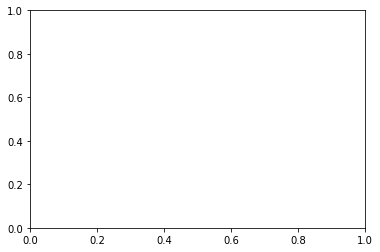

In [42]:
%matplotlib inline
import matplotlib.animation as animation


# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = []
ys = []


# This function is called periodically from FuncAnimation
def animate(i, game_set, win_ratios):

    # Add x and y to lists
    xs.append(game_set)
    ys.append(win_ratios)

    # Limit x and y lists to 20 items
    xs = xs[-20:]
    ys = ys[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys)

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('Win Ratios')
    plt.ylabel('Rate')

# Set up plot to call animate() function periodically
dm.decision_array
win_ratio = []
#num_decisions = []
for j in range(10):
    winners = []
    dm.count_array = np.full((21,21,21,21),0)
    for i in range(11):
        print("Game", i+1)
        player1 = Player('player 1')
        player2 = Player('player 2')
        player1.set_opponent(player2)
        player2.set_opponent(player1)
        playgame(player1,player2)
        #num_decisions.append(dm.count_array.sum())
    winner = max(winners)
    temp = (winner == 'P2')
    dm.reward(dm.decision_array, dm.count_array, winner=temp)
    win_ratio.append(winners.count('P2')/len(winners))
ani = animation.FuncAnimation(fig, animate, fargs=(j, winners.count('P2')/len(winners)), interval=1000)

(array([1., 1., 0., 1., 0., 4., 1., 0., 1., 1.]),
 array([0.18181818, 0.23636364, 0.29090909, 0.34545455, 0.4       ,
        0.45454545, 0.50909091, 0.56363636, 0.61818182, 0.67272727,
        0.72727273]),
 <BarContainer object of 10 artists>)

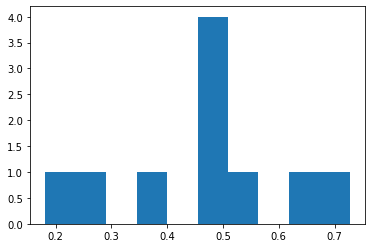

In [31]:
plt.hist(win_ratio)

In [32]:
# Want P2 to have adaptive strategy, keep P1 consistent b/c P1 has significant advantage. (90% of the time a more than 50% chance of winning)
sum(win_ratio > .5)

TypeError: '>' not supported between instances of 'list' and 'float'

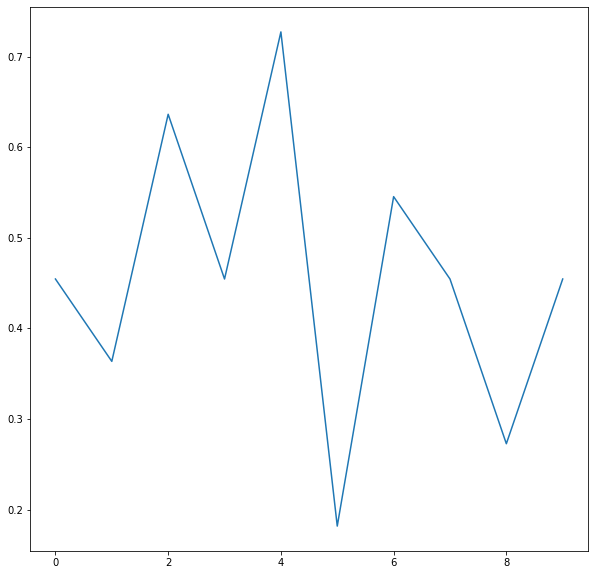

In [33]:
plt.figure(figsize=(10, 10))
plt.plot(win_ratio)

In [25]:
# Try different seed values in decision array, run more games, create more lines on line plot graph (ie more game sets)
# tweak the reward function
# more games on x axis

In [26]:
#num_decisions

[8,
 15,
 33,
 40,
 48,
 56,
 69,
 76,
 94,
 103,
 108,
 121,
 130,
 144,
 153,
 161,
 172,
 183,
 194,
 204,
 214,
 221,
 232,
 239,
 246,
 251,
 257,
 264,
 271,
 281,
 286,
 294,
 302,
 310,
 318,
 326,
 338,
 346,
 354,
 360,
 366,
 376,
 385,
 391,
 400,
 406,
 414,
 421,
 433,
 441,
 446,
 455,
 461,
 470,
 478,
 485,
 493,
 499,
 505,
 514,
 518,
 525,
 536,
 546,
 552,
 560,
 566,
 579,
 586,
 593,
 610,
 618,
 633,
 643,
 653,
 662,
 668,
 681,
 690,
 696,
 712,
 725,
 739,
 747,
 758,
 763,
 769,
 775,
 784,
 791,
 799,
 806,
 812,
 819,
 827,
 842,
 848,
 853,
 858,
 867,
 877,
 5,
 13,
 24,
 32,
 40,
 51,
 56,
 63,
 72,
 80,
 86,
 94,
 103,
 110,
 116,
 123,
 132,
 141,
 146,
 154,
 166,
 181,
 186,
 194,
 202,
 210,
 220,
 228,
 239,
 248,
 260,
 268,
 279,
 286,
 294,
 304,
 314,
 321,
 327,
 341,
 353,
 366,
 375,
 380,
 389,
 400,
 403,
 409,
 415,
 423,
 432,
 441,
 449,
 453,
 463,
 470,
 477,
 481,
 489,
 499,
 504,
 512,
 517,
 523,
 532,
 537,
 549,
 558,
 566,
 57

In [27]:
dm.decision_array

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ...,

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.

In [28]:
dm.count_array

array([[[[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  1,  1, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  4],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0, 40]],

        [[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  1,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  1],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  2]],

        [[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  1,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        ...,

        [[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
    